<a href="https://colab.research.google.com/github/alychuk/Deep_Learning_Homework/blob/main/Homework_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive and Loading Data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive"

'Colab Notebooks'     ENGR301_photos
 cpe201_lab2	      Linux_transfer
'Cpe 301'	      Lychuk-A-0124-Lab1Report.gdoc
 CS135iso	      Pa04-instruct
 Cs219_test	      Random
'cs302 lecture'      'Repeat_Forms.zip (Unzipped Files)'
 cs302lectures	     'Tennis club'
 CS425		     'Various papers'
 CS477		     'Various Reports'
 Deep_Learning_Data  'Windows transfer'
 engr301


In [ ]:
!unzip -q "/content/gdrive/My Drive/Deep_Learning_Data/Small_set_cats_vs_dogs.zip"

In [ ]:
!ls

gdrive	sample_data  Small_set_cats_vs_dogs


# Importing Necessary Libraries

In [ ]:
import tensorflow.keras
import tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
print (tensorflow.__version__)

1.15.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


# Hyper-Parameters Initialization

In [ ]:
epochs = 10
batch_size = 16
training_samples = 4000
validation_samples = 600
img_width = 200
img_height = 200 
channels = 3
input_shape = (img_width,img_height,3)

# Data Generator

In [ ]:

train_data_dir = 'Small_set_cats_vs_dogs/train'
validation_data_dir = 'Small_set_cats_vs_dogs/val'

train_datagen_original = ImageDataGenerator(rescale=1. / 255)

train_datagen_augmented = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.4, 
    zoom_range=0.4, 
    rotation_range=20,
		width_shift_range=0.4,
		height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest") 


val_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator_original = train_datagen_original.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')

train_generator_augmented = train_datagen_augmented.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')
 
  
validation_generator = val_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
  

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# Image Augmentation

In [ ]:
image_batch_1= next(train_generator_augmented)
print(len(image_batch_1[0]))

16


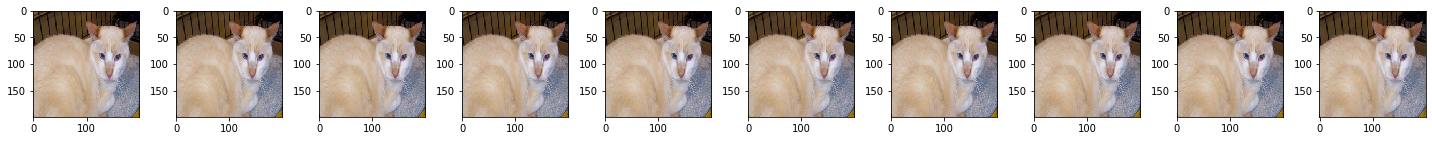

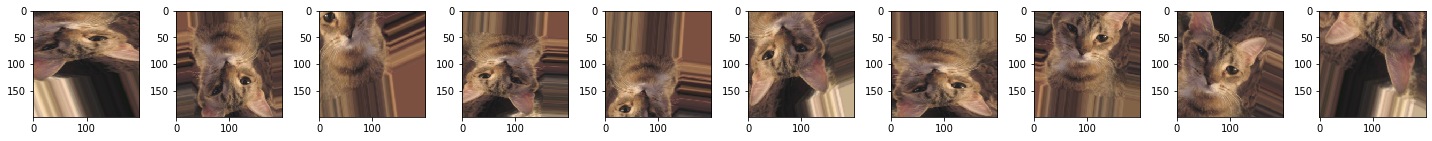

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
original_images = [train_generator_original[0][0][0] for i in range(10)]    
augmented_images = [train_generator_augmented[0][0][0] for i in range(10)]
plotImages(original_images)
plotImages(augmented_images)

# CNN Model

In [ ]:

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape,padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32,(2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
augmented_model = tensorflow.keras.models.clone_model(model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
augmented_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']) 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Model Layout and Visualization




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        8

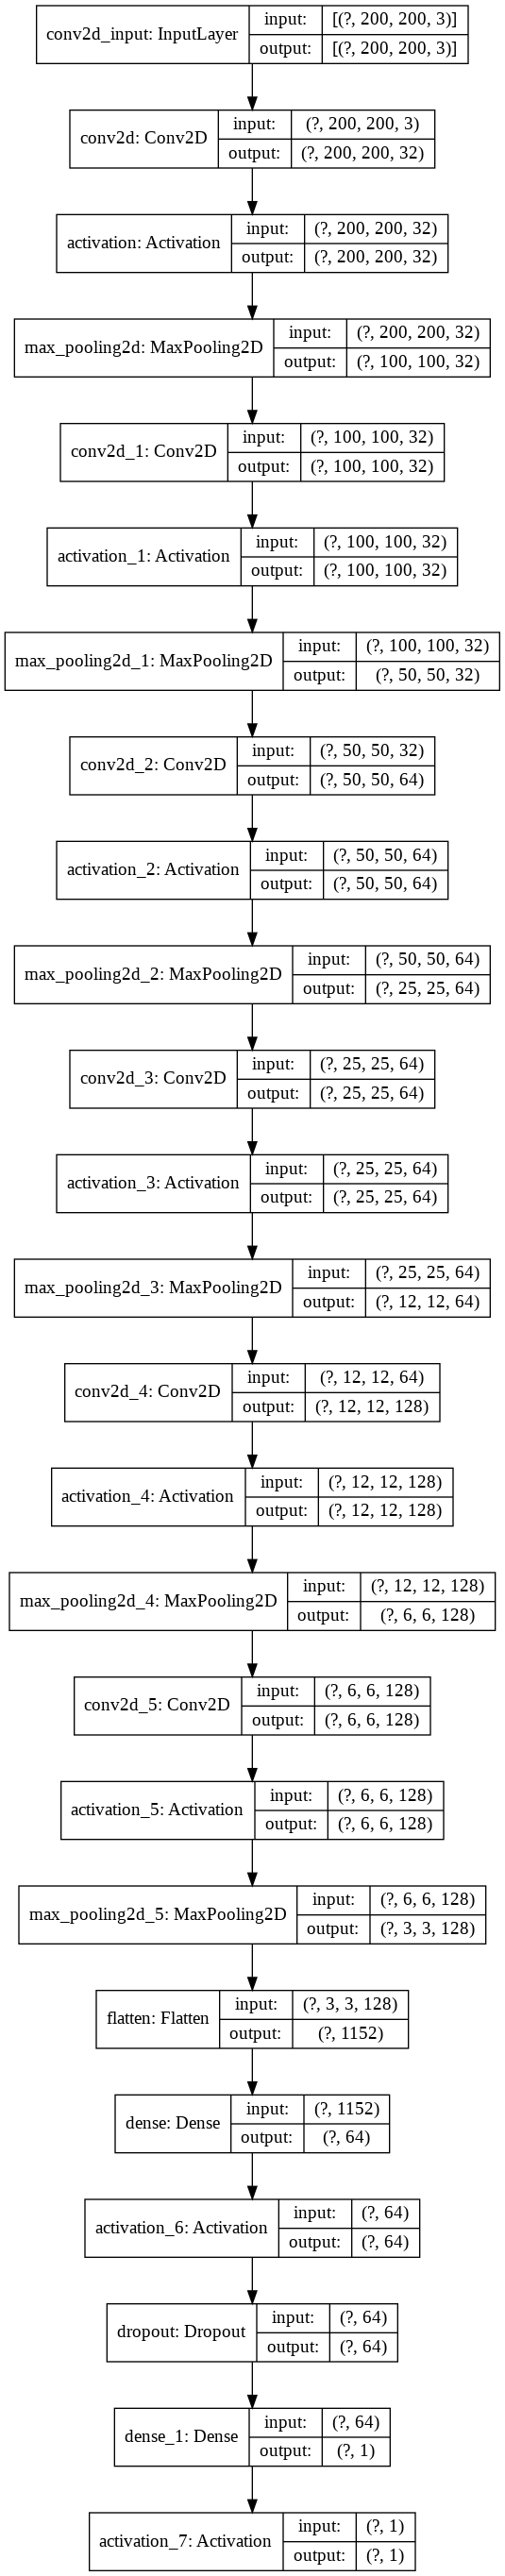

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Callbacks [Bonus]


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name = 'dummy_model_'
checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_acc:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

In [ ]:
reduce_lr_augmented = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name_augmented = 'dummy_model_augmented_'
checkpoint_augmented = ModelCheckpoint(filepath=snapshot_name_augmented+".{epoch:02d}-{val_acc:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

# Training and Validation

In [ ]:
history = model.fit_generator(train_generator_original, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr,checkpoint]) 

Epoch 1/10
250/250 [==============================] - 24s 96ms/step - loss: 0.6931 - acc: 0.5132 - val_loss: 0.6841 - val_acc: 0.5355
Epoch 2/10
250/250 [==============================] - 16s 64ms/step - loss: 0.6645 - acc: 0.5955 - val_loss: 0.6027 - val_acc: 0.6875
Epoch 3/10
250/250 [==============================] - 16s 65ms/step - loss: 0.6143 - acc: 0.6695 - val_loss: 0.5512 - val_acc: 0.7466
Epoch 4/10
250/250 [==============================] - 16s 65ms/step - loss: 0.5780 - acc: 0.7015 - val_loss: 0.5500 - val_acc: 0.7196
Epoch 5/10
250/250 [==============================] - 16s 64ms/step - loss: 0.5424 - acc: 0.7370 - val_loss: 0.4883 - val_acc: 0.7821
Epoch 6/10
250/250 [==============================] - 16s 65ms/step - loss: 0.5175 - acc: 0.7535 - val_loss: 0.4945 - val_acc: 0.7838
Epoch 7/10
175/250 [====================>.........] - ETA: 3s - loss: 0.4595 - acc: 0.7875

In [ ]:
history_augmented = model.fit_generator(train_generator_augmented, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr_augmented,checkpoint_augmented]) 

In [ ]:
model.save_weights('model_saved.h5') 

In [ ]:
augmented_model.save_weights('augmented_model_saved.h5')

# Evaluating the test data

In [ ]:
test_data_dir = 'Small_set_cats_vs_dogs/test'

test_datagen = ImageDataGenerator(rescale=1. / 255) 

test_generator = test_datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 



In [ ]:
model.evaluate_generator(test_generator,  verbose=2)

In [ ]:
augmented_model.evaluate_generator(test_generator, verbose=2)

# Plotting Accuracy and Loss Graph

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_augmented.history['acc'])
plt.plot(history_augmented.history['val_acc'])
plt.title('augmented model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_augmented.history['loss'])
plt.plot(history_augmented.history['val_loss'])
plt.title('augmented model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predicting some sample images

In [ ]:


img = image.load_img('/content/Small_set_cats_vs_dogs/test/cat/cat.6004.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()


In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
# Prediction result
pred = model.predict(images)
print (pred)

# Class Prediction
pred_class = model.predict_classes(images)
print (pred_class)


In [ ]:
img_2 = image.load_img('/content/Small_set_cats_vs_dogs/test/dog/dog.5026.jpg', target_size=(img_width, img_height))
plt.imshow(img_2)
plt.show()

In [ ]:
y = image.img_to_array(img_2)
y = np.expand_dims(y,axis=0)

images = np.vstack([x,y])
# Prediction result
pred = model.predict(images)
print (pred)

# Class Prediction
pred_class = model.predict_classes(images)
print (pred_class)